<a href="https://colab.research.google.com/github/newb-dev-1008/Optimization-Algorithms/blob/additions/Optimization_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What's up boys**
# Read this before proceeding

**I have allotted seperate cells for each of you**. Scroll down and enter the code for the function that contains your algorithm only in the blocks I have shown for each of you. Even if it isn't in Python, doesn't matter; I'll translate it. Just make sure that the code you enter here works with different functions i.e. test your code with some functions and then check if it works.

The function to take the mathematical expression as input is there below. So obtaining the inputs and giving outputs is pretty sorted. **Just enter your respective functions.**

And don't fuck with any other blocks. I have saved whatever I've done so far on GitHub and there's edit history and all but still don't fuck around.



# **Direct Search Algorithms**


# **Function for accepting input functions and intervals**

Please enter your mathematical function:
5*cos(50*x) - 6*sin(37*x)
Enter your start of interval: -3
Enter your end of interval: 3


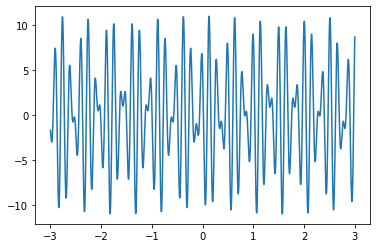

In [ ]:
import numexpr as ne
import matplotlib.pyplot as plt
import numpy as np

def inputFunction(x):
  s = str(input("Please enter your mathematical function:\n"))    # Input the mathematical expression
  
  a = float(input("Enter the start of interval: "))
  b = float(input("Enter the end of interval: "))
  x = np.linspace(a, b, 10000)
  
  y = ne.evaluate(s)
  
  plt.plot(x, y)
  return y


# Sayanth's Block(EXHAUSTIVE SEARCH METHOD)

In [ ]:
# Sayanth's code here
from math import sin, cos, tan, pi, sqrt, pow
import numpy as np
from numpy import *
from cmath import sqrt


def exha(a, b, x, s):
    n = float(input("enter the number of divisions:"))
    delta = (b-a)/n
    k = 1

    #initial 3 values
    x1=a
    x2=a+delta
    x3=a+delta+delta

    #we dont know how many iteration we need so we keep checking till we get our desired input / encounter our desired output
    while (b-a) > 0:
        print("Iteration ", k,":\n")
        print("x1 = ", x1, ", x2 = ", x2, ", x3 = ", x3, "\n\n")
    #evaluate the values of x1,x1+delta,x1+2*delta
   
        a1=float(evaluateFunction(x1,s))
        a2=float(evaluateFunction(x2,s))
        a3=float(evaluateFunction(x3,s))
        x1=x2
        x2=x3
        x3=x3+delta
        k += 1
    
    #this will see if the next iteration hhas a larger value than the previous if it has it will stop and break the program at that point
        if(a3>a2):
            print("the minimum value of this function is {0}".format(a2))
            print("the minimum value lies near the point {0} ".format(x2))
            break

    #output where the minimum lies  
    print("your minimum lies in the interval of ({0},{1})".format(x1-delta,x2))
    
    
    
    
import numexpr as ne


def evaluateFunction(no, st):
    x = no
    y = ne.evaluate(st)
    return y


import numpy as np

s = str(input("Please enter your mathematical function:\n"))    # Input the mathematical expression

a = float(input("Enter the start of interval: "))
b = float(input("Enter the end of interval: "))

x = np.linspace(a, b, 10000)

exha(a, b, x, s)


Please enter your mathematical function:
x*x + 54/x
Enter the start of interval: 2
Enter the end of interval: 5
enter the number of divisions:10
Iteration  1 :

x1 =  2.0 , x2 =  2.3 , x3 =  2.5999999999999996 


Iteration  2 :

x1 =  2.3 , x2 =  2.5999999999999996 , x3 =  2.8999999999999995 


Iteration  3 :

x1 =  2.5999999999999996 , x2 =  2.8999999999999995 , x3 =  3.1999999999999993 


the minimum value of this function is 27.030689655172413
the minimum value lies near the point 3.1999999999999993 
your minimum lies in the interval of (2.5999999999999996,3.1999999999999993)


# **Bisection**

In [ ]:
#bisection
 
def exha(x):
    #change ur function here
    return(float((x**2)+(54/x)))
 
def derv(x):
    if(x<-0.01) or(x>0.01):
        delx=0.01*a
    else:
        delx=0.0001
 
    return (exha(x+delx)-exha(x-delx))/(2*delx)
 
a=float(input("enter your lower bound :\n"))
b=float(input("enter your upper bound :\n"))
elim=float(input("enter your elimination factor :\n"))
 
if(derv(a)>0):
    print("bisection dosent exist")
    
if(derv(b)<0):
    print("bisection dosent exist")
 
while (b-a)>0:                                                    
    z=(a+b)/2
    if abs(derv(z))<elim:
        b=z
        print("Minimum lies between ({0},{1})".format(a,b))
        break
    elif derv(z)<0:
        a=z
    elif derv(z)>0:
        b=z

enter your lower bound :
2
enter your upper bound :
5
enter your elimination factor :
0.5
Minimum lies between (2.75,2.9375)


# **Shariq's Block (INTERVAL HALVING)**

In [ ]:
#Interval Halving method
'''
def func(x):
    return (x**2)+(54/x)                                                       #sample function
    
a=float(input("Enter lower bound 'a':"))
b=float(input("Enter upper bound 'b':"))
E=float(input("Enter termination parameter:"))
'''
 
def intervalHalving(a, b, x, s, E = 0.01):
  y = ne.evaluate(s)
  xm=(a+b)/2
  L=b-a
  i=1
 
  while abs(L)>=E:
      x1=a+L/4
      x2=b-L/4
      
      print("\nITERATION",i,"\n")
      print("x1=",x1,"\n")
      print("x2=",x2,"\n")
      print("xm=",xm,"\n")
      funcx1 = evaluateFunction(x1, s)
      funcx2 = evaluateFunction(x2, s)
      funcxm = evaluateFunction(xm, s)
      print("f(x1)=",funcx1,"\n")
      print("f(x2)=", funcx2,"\n")
      print("f(xm)=", funcxm,"\n")
      
      if (funcx1 < funcxm):
            b=xm
            xm=x1
            L=b-a
            print("Minimum is in the new interval (",a,",",b,")\n")
            if abs(L)<E:
                print("Minimum lies between (",a,",",b,")\n")
                break
                
      elif (funcx2 < funcxm):
          a=xm
          xm=x2
          L=b-a
          print("Minimum is in the new interval (",a,",",b,")\n")
          if abs(L)<E:
                print("Minimum lies between (",a,",",b,")\n")
                break
      
      else:
          a=x1
          b=x2
          L=b-a
          print("Minimum is in the new interval (",a,",",b,")\n")
          if abs(L)<E:
                print("Minimum lies between (",a,",",b,")\n")
                fa = evaluateFunction(a, s)
                fb = evaluateFunction(b, s)
                tup1 = (a, fa)
                tup2 = (b, fb)
                l = []
                l.append(tup1)
                l.append(tup2)
                break
      i+=1
 
  # Plotting the graph
  ttl = "Interval Halving Method Graph"
  generatePlot(x, y, l, ttl)

# **Secant block**

In [ ]:
def func(x):                                  #sample function
    return (x**2)+(54/x)   

def derv(x):                                     #first derivative function
    if (x<-0.01)or(x>0.01):
        delx=0.01*abs(x)             
    else:
        delx=0.0001
    return (func(x+delx)-func(x-delx))/(2*delx)
                                                   
a=float(input("Enter lower bound 'a':"))
b=float(input("Enter upper bound 'b':"))
E=float(input("Enter termination parameter:"))

if derv(a)>=0:
    print("f'(a) is not negative; cant apply Secant Method")
    raise SystemExit()
if derv(b)<=0:
    print("f'(b) is not positive; cant apply Secant Method")
    raise SystemExit()
i=1

while True:                                                     #emulation of do while function
    z=b-((b-a)*derv(b)/(derv(b)-derv(a)))
    
    print("\nITERATION",i,"\n")
    print("z=",round(z,6),"\n")
    print("f'(z)=",round(derv(z),6),"\n")
    
    if abs(derv(z))<E:
        b=z
        print("Minimum lies between (",round(a,6),",",round(b,6),")")
        break
    elif derv(z)<0:
        a=z
        print("New interval is (",round(a,6),",",round(b,6),")")
    elif derv(z)>0:
        b=z
        print("New interval is (",round(a,6),",",round(b,6),")")
    i+=1

Enter lower bound 'a':2
Enter upper bound 'b':5
Enter termination parameter:0.5

ITERATION 1 

z= 3.643725 

f'(z)= 3.219776 

New interval is ( 2.0 , 3.643725 )

ITERATION 2 

z= 3.22769 

f'(z)= 1.271518 

New interval is ( 2.0 , 3.22769 )

ITERATION 3 

z= 3.082786 

f'(z)= 0.482931 

Minimum lies between ( 2.0 , 3.082786 )


# **Newton Raphson**

In [ ]:
def func(x):                                  #sample function
    return (x**2)+(54/x)   

def derv(x):                                     #first derivative function
    if (x<-0.01)or(x>0.01):
        delx=0.01*abs(x)             
    else:
        delx=0.0001
    return (func(x+delx)-func(x-delx))/(2*delx)

def derv2(x):
    if (x<-0.01)or(x>0.01):
        delx=0.01*abs(x)             
    else:
        delx=0.0001
    return (func(x+delx)+func(x-delx)-2*func(x))/(delx**2)
            
                                                   
xk=float(input("Enter initial guess:"))
E=float(input("Enter termination parameter:"))
i=1
    
while True:                                                    
    xk1=xk-(derv(xk)/(derv2(xk)))
    
    print("\nITERATION",i,"\n")
    print("x(",i,")=",round(xk1,6),"\n")
    print("f'(x(",i,"))=",round(derv(xk1),6),"\n") 
    
    if abs(derv(xk1))<E:
        print("Minimum is at",round(xk1,6))
        break
    else:
        xk=xk1
    i+=1

Enter initial guess:2
Enter termination parameter:0.5

ITERATION 1 

x( 1 )= 2.612937 

f'(x( 1 ))= -2.684178 


ITERATION 2 

x( 2 )= 2.946188 

f'(x( 2 ))= -0.329429 

Minimum is at 2.946188


# **Shashank's Block**

In [ ]:
#fibonacci search method 
'''
a=float(input("enter your lower bound :\n"))
b=float(input("enter your upper bound :\n"))
n=float(input("enter number of iterations :\n"))
'''

#series generator
def fibon(n):
	if :n=0 or 1
	    return (n)
  else
	    return (fibon(n-1)+fibon(n-2))
 
#searchfuction
def fibsearch(a,b,s,nt)
l=b-a 
lc=(fibon(n-k+1))*(l)/fibon(n+1)

x1=a+l
x2=a-l

y1=eval(s,x1)
y2=eval(s,x2)
if :(y1<y2)

   else 
   



	 pass





def fibonsearch(a, b, x, s, E = 0.01):
  y = ne.evaluate(s)
  xm=(a+b)/2
  L=b-a
  i=1
 
  while abs(L)>=E:
      x1=a+L/4
      x2=b-L/4
      
      print("\nITERATION",i,"\n")
      print("x1=",x1,"\n")
      print("x2=",x2,"\n")
      print("xm=",xm,"\n")
      funcx1 = evaluateFunction(x1, s)
      funcx2 = evaluateFunction(x2, s)
      funcxm = evaluateFunction(xm, s)
      print("f(x1)=",funcx1,"\n")
      print("f(x2)=", funcx2,"\n")
      print("f(xm)=", funcxm,"\n")
      
      if (funcx1 < funcxm):
            b=xm
            xm=x1
            L=b-a
            print("Minimum is in the new interval (",a,",",b,")\n")
            if abs(L)<E:
                print("Minimum lies between (",a,",",b,")\n")
                break
                
      elif (funcx2 < funcxm):
          a=xm
          xm=x2
          L=b-a
          print("Minimum is in the new interval (",a,",",b,")\n")
          if abs(L)<E:
                print("Minimum lies between (",a,",",b,")\n")
                break
      
      else:
          a=x1
          b=x2
          L=b-a
          print("Minimum is in the new interval (",a,",",b,")\n")
          if abs(L)<E:
                print("Minimum lies between (",a,",",b,")\n")
                fa = evaluateFunction(a, s)
                fb = evaluateFunction(b, s)
                tup1 = (a, fa)
                tup2 = (b, fb)
                l = []
                l.append(tup1)
                l.append(tup2)
                break
      i+=1
 
  # Plotting the graph
  ttl = "Interval Halving Method Graph"
  generatePlot(x, y, l, ttl)

# **Suraj's Block (Bounding Phase)**

In [ ]:
# Suraj's code here
x=float(input('enter the initial point '))
f= x**2+(54/x)
d1=float(input('enter the incremental value'))
d2=0
a=x-d1
b=x+d1
i=0
m= a**2+(54/a)
n=b**2+(54/b)

if m>f and f>n:
    d2=d1
    print('Right search operation')
    
elif m<f and f<n:
    d2=d1*(-1)
    print('left search operation')
    
else:
    print('Minimum in the interval (%.2f,%.2f)'%(a,b))


x2=x+d2
N=1
            
while N<100:
    y= pow(x,2)+(54/x)
    x= x+(2**i)*d2

    i+=1
    z= x**2+(54/x)
    if z>y:
        break
    N+=1    

if d2>0:
    print("minimum lies in the interval (%.2f,%.2f)"%(x2,x))    
else:
    print("minimum lies in the interval (%.2f,%.2f)"%(x,x2)) 

   
    enter the initial point 1
enter the incremental value 0.5
Right search operation
minimum in the interval (1.50,4.50)

enter the initial point 4.5
enter the incremental value 0.5
left search operation
minimum  lies in the interval (1.00,4.00)



   


    
        

# **Vikas's Block**

In [ ]:
# Vikas's code here

import math
from decimal import Decimal
def f(x):1
    return Decimal(x**2+(54/x))
x1=Decimal(input("Enter the initial point"))
dx=Decimal(input("Enter step difference"))
E=Decimal(input("Enter the termination parameter"))
i=1
x=[]
y=[]
x2=x1+dx
x3=x2+dx
while True :
    print("")
    print("iteration no. = ", i)
    i=i+1
    fx1=f(x1)
    fx2=f(x2)
    fx3=f(x3)
    print("")
    print("x1 =",x1,",x2 =",x2 ,",x3 = ",x3)
    print("fx1 =",fx1," ,fx2 =",fx2," ,fx3 =",fx3)
    fmin=min(fx1,fx2,fx3)
    if fmin==fx1:
        xmin=x1
    elif fmin==fx2:
        xmin=x2
    elif fmin==fx3:
        xmin=x3
    print("Fmin =",fmin)
    print("Xmin=",xmin)
    a1=(fx2-fx1)/(x2-x1)
    a2=(1/(x3-x2))*(((fx3-fx1)/(x3-x1))-a1)
    print("a1 =",a1,",a2 =",a2)
    xbar=((x1+x2)/2)-(a1/(2*a2))
    fxbar=f(xbar)
    print("xbar",xbar)
    print("fxbar=",fxbar)
    a1=abs(fmin-fxbar)
    b1=abs(xmin-xbar)
    if a1<E and b1<E:
        print("the minimum lies in =",x3)
        break
    else:
        print("not small when compared to E")
        x=[fx1,fx2,fx3,fxbar]
        x.sort() 
        print(x)
        if x[0]==fx1:
            a=x1
        elif x[0]==fx2:
            a=x2
        elif x[0]==fx3:
            a=x3
        elif x[0]==fxbar:
            a=xbar
        if x[1]==fx1:
            b=x1
        elif x[1]==fx2:
            b=x2
        elif x[1]==fx3:
            b=x3
        elif x[1]==fxbar:
            b=xbar
        if x[2]==fx1:
            c=x1
        elif x[2]==fx2:
            c=x2
        elif x[2]==fx3:
            c=x3
        elif x[2]==fxbar:
            c=xbar
        y=[a,b,c]
        y.sort()
        print(y)
        x1=y[0]
        x2=y[1]
        x3=y[2]

In [ ]:
Enter the initial point
1

Enter the step difference
1

Enter the termination parameter
0.01

iteration no. =  1

x1 = 1 ,x2 = 2 ,x3 =  3
fx1 = 55  ,fx2 = 31  ,fx3 = 27
Fmin = 27
Xmin= 3
a1 = -24 ,a2 = 10
xbar 2.7
fxbar= 27.29
not small when compared to E
[Decimal('27'), Decimal('27.29'), Decimal('31'), Decimal('55')]
[Decimal('2'), Decimal('2.7'), Decimal('3')]

iteration no. =  2

x1 = 2 ,x2 = 2.7 ,x3 =  3
fx1 = 31  ,fx2 = 27.29  ,fx3 = 27
Fmin = 27
Xmin= 3
a1 = -5.3 ,a2 = 4.333333333333333333333333333
xbar 2.961538461538461538461538462
fxbar= 27.00447629293783139936986091
not small when compared to E
[Decimal('27'), Decimal('27.00447629293783139936986091'), Decimal('27.29'), Decimal('31')]
[Decimal('2.7'), Decimal('2.961538461538461538461538462'), Decimal('3')]

iteration no. =  3

x1 = 2.7 ,x2 = 2.961538461538461538461538462 ,x3 =  3
fx1 = 27.29  ,fx2 = 27.00447629293783139936986091  ,fx3 = 27
Fmin = 27
Xmin= 3
a1 = -1.091708291708291708291708283 ,a2 = 3.251082251082251082251082063
xbar 2.998668442077230359520639156
fxbar= 27.00000532071414672516594779
the minimum lies in = 3

# **Yash's Block**
**Golden Section Search**

In [ ]:
# Yash's code here (Golden Section Search Method)

def GoldenSectionSearch(a, b, x, s, eps = 0.01):
  w = (x - a)/ (b - a)                                                                          # Normalizing x
  y = ne.evaluate(s)

  aw = 0
  bw = 1                                                                                        # Initializing each variable
  Lw = 1
  k = 1

  while (Lw > eps):
    print("\n------------------------------------------------------------------\n")
    print("Iteration ", k,":\n")
    print("a = ", aw, ", b = ", bw, ", Lw = ", Lw, "\n\n")
    w1 = aw + (0.618 * Lw)
    w2 = bw - (0.618 * Lw)

    yw1 = evaluateFunction(w1, s)                                                               # Finding output of the function for distinct input values
    yw2 = evaluateFunction(w2, s)

    if (w1 < w2):
      if (yw1 < yw2):
        print ("F(", w1,") < F(", w2,") = ", yw1, " < ", yw2, "\n")
        bw = w2
      else:
        print ("F(", w1, ") > F(", w2, ") = ", yw1, " > ", yw2, "\n")
        aw = w1
    else:
      if (yw1 < yw2):
        print ("F(", w1,") < F(", w2,") = ", yw1, " < ", yw2, "\n")
        aw = w2
      else:
        print ("F(", w1, ") > F(", w2, ") = ", yw1, " > ", yw2, "\n")
        bw = w1

    print("New interval: (", aw, ", ", bw,")\n")
    Lw = bw - aw
    k += 1

  a = (aw * (b - a)) + a
  b = (bw * (b - a)) + a

  print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n')
  print("Interval lies between (", a, ", ", b, ").\n")
  fa = evaluateFunction(a, s)
  fb = evaluateFunction(b, s)
  print("F(", a,") = ", fa, "\n")
  print("F(", b,") = ", fb, "\n\n")
  l = []
  tup1 = (a, fa)
  tup2 = (b, fb)
  l.append(tup1)
  l.append(tup2)
  print("====================================================================\n\n")

  # Plotting the graph
  ttl = "Golden Section Search Algorithm Plot"
  generatePlot(x, y, l, ttl)

In [ ]:
import numexpr as ne

def evaluateFunction(no, st):
  x = no
  y = ne.evaluate(st)

  return y

# **Function to generate plots for all single-variable algorithms**

In [ ]:
import matplotlib.pyplot as plt

def generatePlot(x, y, pts, title):
  plt.figure(figsize = [20, 10])
  plt.plot(x, y)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(title)

  x1 = []
  y1 = []

  for i in pts:
    x1.append(i[0])
    y1.append(i[1])

  plt.scatter(x1, y1, marker = 'x', s = 100)
  plt.grid()

# **Run the code here**
Run this block to execute all single-variable optimization algorithms.

Please enter your mathematical function:
sin(x)
Enter the start of interval: -5
Enter the end of interval: 5

------------------------------------------------------------------

Iteration  1 :

a =  0 , b =  1 , Lw =  1 


F( 0.618 ) > F( 0.382 ) =  0.5794062426392174  >  0.3727770556052249 

New interval: ( 0 ,  0.618 )


------------------------------------------------------------------

Iteration  2 :

a =  0 , b =  0.618 , Lw =  0.618 


F( 0.381924 ) > F( 0.236076 ) =  0.37270653253743957  >  0.2338892759517725 

New interval: ( 0 ,  0.381924 )


------------------------------------------------------------------

Iteration  3 :

a =  0 , b =  0.381924 , Lw =  0.381924 


F( 0.236029032 ) > F( 0.14589496799999999 ) =  0.23384361043398436  >  0.14537794784699135 

New interval: ( 0 ,  0.236029032 )


------------------------------------------------------------------

Iteration  4 :

a =  0 , b =  0.236029032 , Lw =  0.236029032 


F( 0.14586594177599999 ) > F( 0.09016309022400001 ) 

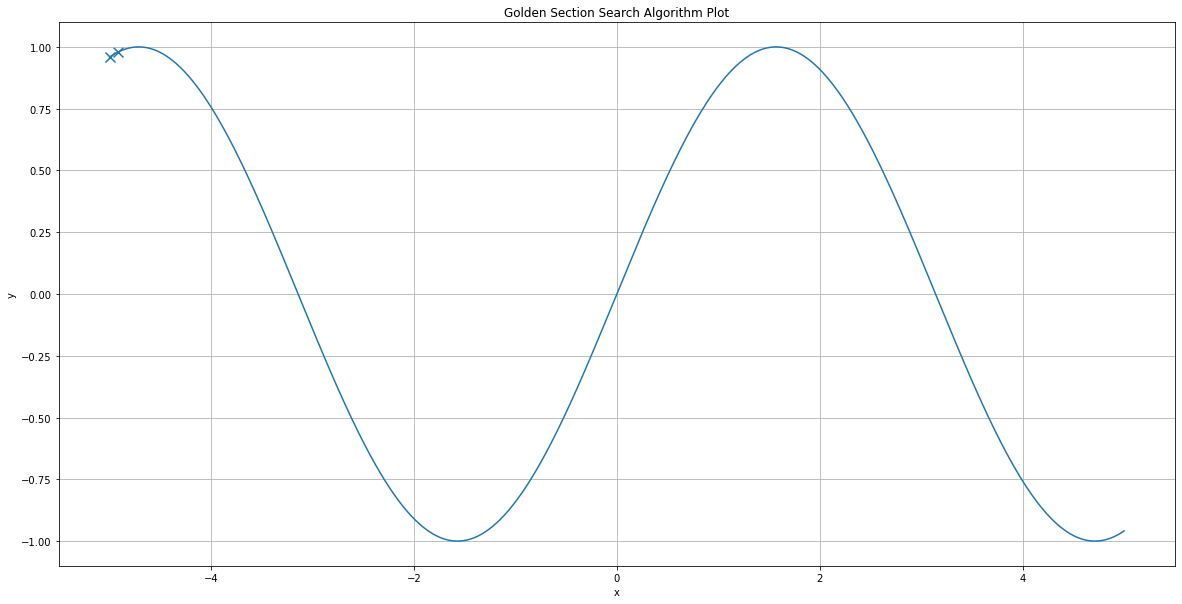

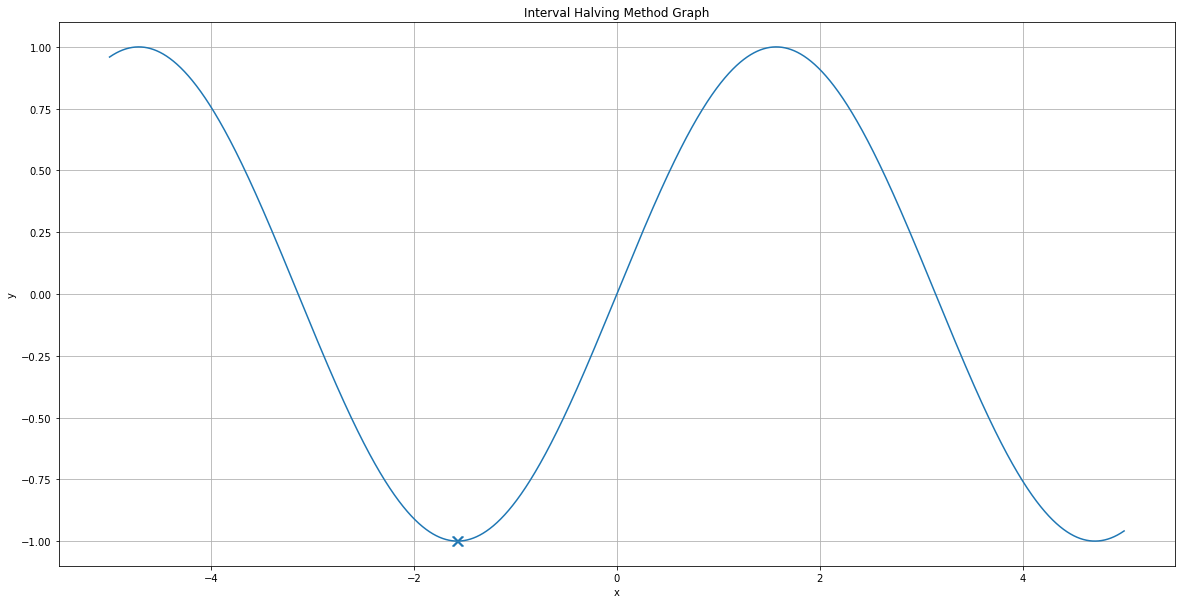

In [ ]:
# Code Initializer
import numpy as np

s = str(input("Please enter your mathematical function:\n"))    # Input the mathematical expression

a = float(input("Enter the start of interval: "))
b = float(input("Enter the end of interval: "))

x = np.linspace(a, b, 10000)

GoldenSectionSearch(a, b, x, s)

input("Press any key to continue:\n")

intervalHalving(a, b, x, s)

In [ ]:
s = str(input("Please enter your mathematical function:\n"))    # Input the mathematical expression
  
a = float(input("Enter the start of interval: "))
b = float(input("Enter the end of interval: "))
x = 3
  
y = ne.evaluate(s)
print(y)

Please enter your mathematical function:
x**2 - (54/x)
Enter the start of interval: -5
Enter the end of interval: 5


NameError: ignored